In [ ]:
! nvidia-smi

Sun Jun 20 14:28:30 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install keras==2.3.1

     |████████████████████████████████| 378kB 8.4MB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [ ]:
# import tensorflow.keras as keras
from keras.legacy import interfaces
import numpy as np
import os
import random

In [ ]:
! pip install keras-tuner
import tensorflow as tf
import numpy as np
import os
import random
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Input, Concatenate, GlobalMaxPool1D, LSTM, MaxPool1D
from tensorflow.keras.layers import ReLU, BatchNormalization, Bidirectional, concatenate, Reshape, TimeDistributed
from tensorflow.keras.layers import Conv2D, ConvLSTM2D, MaxPool2D, SpatialDropout2D, Softmax, ELU, Layer, Masking
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalMaxPool2D, LeakyReLU, LSTMCell, RNN, InputSpec
from tensorflow.keras.layers import concatenate, Conv1DTranspose, Conv2DTranspose, Flatten, StackedRNNCells
from tensorflow.keras.initializers import Constant
from tensorflow.keras.models import Model
from tensorflow.keras import Input
from tensorflow import keras as keras
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from matplotlib import pyplot as plt
import kerastuner as kt
from kerastuner.tuners import RandomSearch, BayesianOptimization, Hyperband
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalAveragePooling1D, Permute, multiply, Activation
import tensorflow.keras.backend as K

from tensorflow.keras import backend as K
from tensorflow.keras import activations
from tensorflow.keras import initializers
from tensorflow.keras import regularizers
from tensorflow.keras import constraints


     |████████████████████████████████| 102kB 9.7MB/s 
  Created wheel for kt-legacy: filename=kt_legacy-1.0.3-cp37-none-any.whl size=9569 sha256=d2b99c4c0c5e7e7e7df51806e0e4d13a3c80ef3127500c32931a16a80821a2a7
  Stored in directory: /root/.cache/pip/wheels/95/99/a8/6b116b0f69be60cc475d1cd36680f3a09f284d86655bb99d93
Successfully built kt-legacy


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.


# Loading CASIA-B for FUTURE USE

In [ ]:
! wget 'http://www.cbsr.ia.ac.cn/GaitDatasetB-silh.zip'

--2021-06-10 10:28:03--  http://www.cbsr.ia.ac.cn/GaitDatasetB-silh.zip
Resolving www.cbsr.ia.ac.cn (www.cbsr.ia.ac.cn)... 159.226.21.60
Connecting to www.cbsr.ia.ac.cn (www.cbsr.ia.ac.cn)|159.226.21.60|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 659103200 (629M) [application/x-zip-compressed]
Saving to: ‘GaitDatasetB-silh.zip’

GaitDatasetB-silh.z   0%[                    ] 979.17K   296KB/s    eta 36m 9s ^C


In [ ]:
! cp '/content/GaitDatasetB-silh.zip' '/content/drive/Shareddrives/Datasets/'

In [ ]:
! unzip '/content/GaitDatasetB-silh.zip' -d '/content/drive/Shareddrives/Datasets/CASIA-B-raw/'

In [ ]:
import os
os.listdir('/content/drive/Shareddrives/Datasets/CASIA-B-raw/GaitDatasetB-silh')

In [ ]:
cd '/content/drive/Shareddrives/Datasets/CASIA-B-raw/GaitDatasetB-silh/'

In [ ]:
! tar --version
for item in os.listdir('/content/drive/Shareddrives/Datasets/CASIA-B-raw/GaitDatasetB-silh/'):
    os.system(f'tar -xzvf {item}')

In [ ]:
! unzip '/content/drive/Shareddrives/Datasets/CASIA-B.zip' -d '/content/drive/Shareddrives/Datasets/'

# TIFS20

In [ ]:
cd '/content/drive/Shareddrives/MMH/TIFS20'

/content/drive/Shareddrives/MMH/TIFS20


In [ ]:
! unzip '/content/drive/Shareddrives/MMH/TIFS20/Dataset #1.zip'
! unzip '/content/drive/Shareddrives/MMH/TIFS20/Dataset #2.zip'
! unzip '/content/drive/Shareddrives/MMH/TIFS20/Dataset #3.zip'
! unzip '/content/drive/Shareddrives/MMH/TIFS20/Dataset #4.zip'
! unzip '/content/drive/Shareddrives/MMH/TIFS20/Dataset #5.zip'
! unzip '/content/drive/Shareddrives/MMH/TIFS20/Dataset #6.zip'
! unzip '/content/drive/Shareddrives/MMH/TIFS20/Dataset #7.zip'
! unzip '/content/drive/Shareddrives/MMH/TIFS20/Dataset #8.zip'

In [ ]:
cd '/content/drive/Shareddrives/MMH'

/content/drive/Shareddrives/MMH


In [ ]:
! git clone 'https://github.com/qinnzou/Gait-Recognition-Using-Smartphones.git'

Cloning into 'Gait-Recognition-Using-Smartphones'...
remote: Enumerating objects: 248, done.
remote: Total 248 (delta 0), reused 0 (delta 0), pack-reused 248
Receiving objects: 100% (248/248), 9.61 MiB | 21.96 MiB/s, done.
Resolving deltas: 100% (105/105), done.


# select TensoFlow version (currently using 2.x)

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

# Mobile Gait Recognition

In [ ]:
'''
Dataset #7 CNN
We took 577 samples from 10 subjects, with data shape of 6×1024. 519 of them were used for
training and 58 were used for testing. Both the training and testing datasets have data from these
10 subjects. There is no overlap between the training sample and the test sample.

Dataset #8
We took 1,354 samples from 118 subjects, with data shape of 6×1024. In order to make the
training and test data come from different subjects, we use 1022 samples from 20 subjects as
training data and 332 samples from other 98 subjects for testing.

======== code/gait-extraction/tf_seg_new.ipynb ============
This part of the code is used to do gait-extraction training, corresponding to Dataset #7 and Dataset #8.
In these two data sets, each samlpe has 1024 rows, that is, the data length in the time series is 1024. 
There are 6 columns in each row. The first three columns are the data of the X, Y, and Z axes of the accelerometer, and the last three columns are the data of the X, Y, and Z axes of the gyroscope.
===========================================================

'''

In [ ]:
'''Dataset 1 CNN -> best accuracy:0.9318182'''
'''
This dataset is collected on 118 subjects. The collected gait data have been annotated into every
two steps. Meanwhile, a single sample is interpolated into a fixed length of 128 (using Linear
Interpolation function). In order to enlarge the scale of the dataset, we make a one-step overlap
between two neighboring samples for all subjects. In this way, a total number of 36,884 gait
samples are collected. We use 33,104 samples for training, and the rest 3,740 for test.
'''
! python3 '/content/drive/Shareddrives/MMH/Gait-Recognition-Using-Smartphones/code/identification/CNN/CNN.py'





The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.




2021-06-10 13:28:40.205903: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2021-06-10 13:28:40.206235: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x563c2c9072c0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-06-10 13:28:40.206274: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-06-10 13:28:40.210760: I tensorflow/stream_executor/pl

In [ ]:
'''Dataset 2 CNN'''
'''
This dataset is collected on 20 subjects. We also divide the gait curve into two-step samples and
interpolate them into the same length of 128. As each subject in this dataset has a much larger
amount of data as compared to the that in Dataset #1, we do not make overlap between the
samples. Finally, a total number of 49,275 samples are collected, in which 44,339 samples are
used for training, and the rest 4,936 for test.
'''
! python3 '/content/drive/Shareddrives/MMH/Gait-Recognition-Using-Smartphones/code/identification/CNN/CNN.py'





The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.




2021-06-10 13:41:10.688282: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2021-06-10 13:41:10.688486: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55e1197332c0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-06-10 13:41:10.688518: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-06-10 13:41:10.690243: I tensorflow/stream_executor/pl

In [ ]:
'''Dataset #3 CNN -> best accuracy:0.9257773
This dataset is collected on the same 118 subjects as in Dataset #1. Different from Dataset #1,
we divide the gait curve by using a fixed time length, instead of a step length. Exactly, we collect
a sample with a time interval of 2.56 seconds. While the frequency of data collection is 50Hz, the
length of each sample is also 128. Also, we make an overlap of 1.28 seconds to enlarge the
dataset. A total number of 29,274 samples are collected, in which 26,283 samples are used for
training, and the rest 2,991 for test.'''

! python3 '/content/drive/Shareddrives/MMH/Gait-Recognition-Using-Smartphones/code/identification/CNN/CNN.py'





The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.




2021-06-10 13:45:55.690597: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2021-06-10 13:45:55.690811: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55c95db3d2c0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-06-10 13:45:55.690842: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-06-10 13:45:55.692591: I tensorflow/stream_executor/pl

In [ ]:
'''
Dataset #4 -> CNN -> 
This dataset is collected on 20 subjects. We also divide the gait curve in an interval of 2.56
seconds. We make no overlap between the samples. Finally, a total number of 39,314 samples are
collected, in which 35,373 samples are used for training, and the rest 3,941 for test.
'''
! python3 '/content/drive/Shareddrives/MMH/Gait-Recognition-Using-Smartphones/code/identification/CNN/CNN.py'





The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.




2021-06-10 14:04:59.211185: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2021-06-10 14:04:59.211383: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55b0ee2712c0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-06-10 14:04:59.211426: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-06-10 14:04:59.213279: I tensorflow/stream_executor/pl

In [ ]:
'''
Dataset #5 -> CNN -> 
This dataset is used for authentication. It contains 74,142 authentication samples of 118
subjects, where the training set is constructed on 98 subjects and the test set is constructed on theother 20 subjects. There are 66,542 samples and 7,600 samples for training and test, respectively.
Each authentication sample contains a pair of data sample that are from two different subjects or
one same subject. The data sample consists of a 2-step acceleration and gyroscopic data, which are
interpolated in the way as described in Dataset #1 and Dataset #2. The two data samples are
horizontally aligned to create an authentication sample.
'''

! python3 '/content/drive/Shareddrives/MMH/Gait-Recognition-Using-Smartphones/code/identification/CNN/CNN.py'





The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.




2021-06-10 14:00:23.721716: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2021-06-10 14:00:23.721927: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55e60056d2c0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-06-10 14:00:23.721966: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-06-10 14:00:23.725654: I tensorflow/stream_executor/pl

In [ ]:
'''
Dataset #6 CNN -> 
This dataset is also used for authentication. The authentication samples are constructed as the
same as in Dataset #5. The only difference is that, in authentication sample construction, two data
samples from two subjects are vertically aligned instead of horizontally aligned.
The information of datasets #1 - #6 are detailed as below:
'''
! python3 '/content/drive/Shareddrives/MMH/Gait-Recognition-Using-Smartphones/code/identification/CNN/CNN.py'





The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.




2021-06-10 13:55:29.462572: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2021-06-10 13:55:29.462854: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5631207cb2c0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-06-10 13:55:29.462887: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-06-10 13:55:29.464593: I tensorflow/stream_executor/pl

In [ ]:
'''
Dataset # 1- > Single LSTM ACC
final test accuracy: 0.8989304900169373
best epoch's test accuracy: 0.909358263015747
'''
! python3 '/content/drive/Shareddrives/MMH/Gait-Recognition-Using-Smartphones/code/identification/LSTMs/singleLSTMAcc3.py' 


Some useful info to get an insight on dataset's shape and normalisation:
features shape, labels shape, each features mean, each features standard deviation
(3740, 128, 3) (3740, 118) -1.9291381 6.7071652
the dataset is therefore properly normalised, as expected.

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this A

In [ ]:
'''
Dataset # 1- > Single LSTM SQRT
final test accuracy: 0.9101604223251343
best epoch's test accuracy: 0.9139037728309631
'''
! python3 '/content/drive/Shareddrives/MMH/Gait-Recognition-Using-Smartphones/code/identification/LSTMs/singleLSTMSqrt.py'


Some useful info to get an insight on dataset's shape and normalisation:
features shape, labels shape, each features mean, each features standard deviation
(3740, 128, 6) (3740, 118) -0.9641867 4.865548
the dataset is therefore properly normalised, as expected.

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this AP

In [ ]:
'''
Dataset # 1- > Single LSTM Gyro
final test accuracy: 0.8540107011795044
best epoch's test accuracy: 0.8719251155853271
'''
! python3 '/content/drive/Shareddrives/MMH/Gait-Recognition-Using-Smartphones/code/identification/LSTMs/singleLSTMGyr3.py'


Some useful info to get an insight on dataset's shape and normalisation:
features shape, labels shape, each features mean, each features standard deviation
(3740, 128, 3) (3740, 118) 0.0007652593 0.7062419
the dataset is therefore properly normalised, as expected.

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this

In [ ]:
'''
Dataset # 1 -> Single LSTM
final test accuracy: 0.9131016135215759
best epoch's test accuracy: 0.9171122908592224
'''
! python3 '/content/drive/Shareddrives/MMH/Gait-Recognition-Using-Smartphones/code/identification/LSTMs/singleLSTM6.py'


Some useful info to get an insight on dataset's shape and normalisation:
features shape, labels shape, each features mean, each features standard deviation
(3740, 128, 6) (3740, 118) -0.9641867 4.865548
the dataset is therefore properly normalised, as expected.

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this AP

In [ ]:
'''
Dataset # 1 -> Double LSTM Accel
final test accuracy: 0.903743326663971
best epoch's test accuracy: 0.908823549747467
'''
! python3 '/content/drive/Shareddrives/MMH/Gait-Recognition-Using-Smartphones/code/identification/LSTMs/doubleLSTMAcc3.py'


Some useful info to get an insight on dataset's shape and normalisation:
features shape, labels shape, each features mean, each features standard deviation
(3740, 128, 3) (3740, 118) -1.9291381 6.7071652
the dataset is therefore properly normalised, as expected.

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this A

In [ ]:
! python3 '/content/drive/Shareddrives/MMH/Gait-Recognition-Using-Smartphones/code/identification/LSTMs/doubleLSTMSqrt.py'


Some useful info to get an insight on dataset's shape and normalisation:
features shape, labels shape, each features mean, each features standard deviation
(3740, 128, 6) (3740, 118) -0.9641867 4.865548
the dataset is therefore properly normalised, as expected.

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this AP

In [ ]:
! python '/content/drive/Shareddrives/MMH/Gait-Recognition-Using-Smartphones/code/identification/CNN+LSTM/cnn_fix.py'




2021-06-10 17:11:19.511573: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2021-06-10 17:11:19.511774: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55d9a52eb100 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-06-10 17:11:19.511820: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-06-10 17:11:19.513419: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-06-10 17:11:19.741901: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-10 17:11:19.742587: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55d9a52ead80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2021-0

In [ ]:
! python3 '/content/drive/Shareddrives/MMH/Gait-Recognition-Using-Smartphones/code/identification/CNN+LSTM/CNN-LSTM.py'

# Bad Coders' Production

In [ ]:
def load_X(path):
    X_signals = []
    files = os.listdir(path)
    files.sort(key=str.lower)
    #['train_acc_x.txt', 'train_acc_y.txt', 'train_acc_z.txt', 'train_gyr_x.txt', 'train_gyr_y.txt', 'train_gyr_z.txt']
    for my_file in files:
        fileName = os.path.join(path,my_file)
        file = open(fileName, 'r')
        X_signals.append(
            [np.array(cell, dtype=np.float32) for cell in [
                row.strip().split(' ') for row in file
            ]]
        )
        file.close()
        #X_signals = 6*totalStepNum*128
    X_signals = np.transpose(np.array(X_signals), (1, 0, 2))#(totalStepNum*6*128)
    return X_signals.reshape(-1,6,128,1)#(totalStepNum*6*128*1)

def load_y(y_path):
    file = open(y_path, 'r')
    # Read dataset from disk, dealing with text file's syntax
    y_ = np.array(
        [elem for elem in [
            row.replace('  ', ' ').strip().split(' ') for row in file
        ]],
        dtype=np.int32
    )
    file.close()
    # Substract 1 to each output class for friendly 0-based indexing
    y_ = y_ - 1
    #one_hot
    y_ = y_.reshape(len(y_))
    n_values = int(np.max(y_)) + 1
    return np.eye(n_values)[np.array(y_, dtype=np.int32)]  # Returns FLOATS


def weight_variable(shape):
    initial = tf.random.truncated_normal(shape, std_dev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)


X_train = load_X('/content/drive/Shareddrives/MMH/TIFS20/Dataset #2/train/Inertial Signals')
X_test = load_X('/content/drive/Shareddrives/MMH/TIFS20/Dataset #2/test/Inertial Signals')
train_label = load_y('/content/drive/Shareddrives/MMH/TIFS20/Dataset #2/train/y_train.txt')
test_label = load_y('/content/drive/Shareddrives/MMH/TIFS20/Dataset #2/test/y_test.txt')
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

batch_size = 512
num_classes = 118

In [ ]:
def base_model(input_seq):
    num_of_filters = 32
    convolved = Conv1D(num_of_filters, 8, padding='same', activation='relu')(input_seq)
    processed = GlobalMaxPool1D()(convolved)
    compressed = Dense(118, activation='softmax')(processed)
    model = Model(inputs=input_seq, outputs=compressed)
    return model

In [ ]:
input_seq = Input(shape=(6, 128))
model = base_model(input_seq)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")

In [ ]:
model.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 6, 128)]          0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 6, 32)             32800     
_________________________________________________________________
global_max_pooling1d_13 (Glo (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 118)               3894      
Total params: 36,694
Trainable params: 36,694
Non-trainable params: 0
_________________________________________________________________


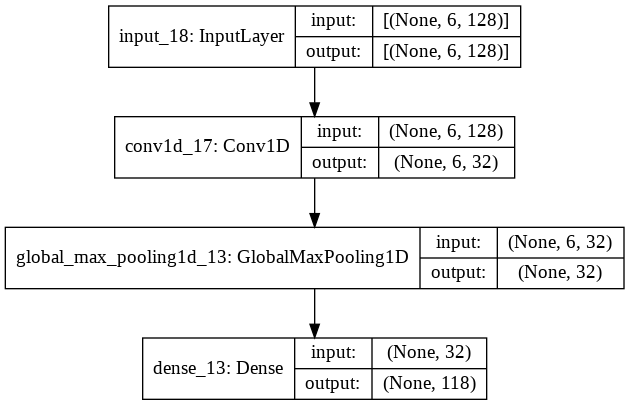

In [ ]:
import tensorflow
tensorflow.keras.utils.plot_model(
    model, to_file='base_model.png', show_shapes=True, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

In [ ]:
# model.fit(X_train, train_label, epochs=10)

In [ ]:
# model.save('/content/drive/Shareddrives/MMH/models/base_model.h5')

In [ ]:
input_seq = Input(shape=(6, 128))
model = base_model(input_seq)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")

Epoch 1/30
59/59 [==============================] - 1s 10ms/step - loss: 4.4792 - accuracy: 0.1919 - val_loss: 2.7270 - val_accuracy: 0.4186
Epoch 2/30
59/59 [==============================] - 0s 7ms/step - loss: 1.9792 - accuracy: 0.5766 - val_loss: 1.5387 - val_accuracy: 0.6660
Epoch 3/30
59/59 [==============================] - 0s 8ms/step - loss: 1.2194 - accuracy: 0.7379 - val_loss: 1.1458 - val_accuracy: 0.7460
Epoch 4/30
59/59 [==============================] - 0s 7ms/step - loss: 0.9116 - accuracy: 0.8015 - val_loss: 0.9193 - val_accuracy: 0.7928
Epoch 5/30
59/59 [==============================] - 0s 7ms/step - loss: 0.7422 - accuracy: 0.8380 - val_loss: 0.8067 - val_accuracy: 0.8263
Epoch 6/30
59/59 [==============================] - 0s 7ms/step - loss: 0.6338 - accuracy: 0.8568 - val_loss: 0.7202 - val_accuracy: 0.8426
Epoch 7/30
59/59 [==============================] - 0s 7ms/step - loss: 0.5473 - accuracy: 0.8772 - val_loss: 0.6541 - val_accuracy: 0.8559
Epoch 8/30
59/59 [=

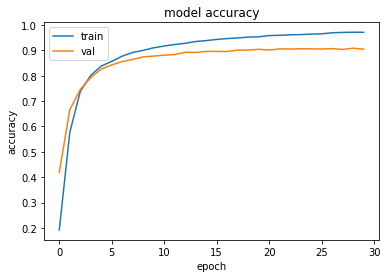

In [ ]:
import keras
from matplotlib import pyplot as plt

# es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, train_label, validation_split = 0.1, epochs=30, shuffle=True, batch_size=512)#, callbacks=[es_callback])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(x_test, test_label, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.573080062866211
Test accuracy: 0.83315509557724


#CNN  New

In [ ]:
# model = Sequential()
# model.add(Dense(num_classes * 8, input_shape=(6, 128),  activation = 'relu' )) 
# model.add(Dropout(0.5))

# model.add(Dense(num_classes * 4, activation = 'relu'))
# model.add(Dropout(0.2))

# model.add(Dense(num_classes * 2, activation = 'relu'))
# model.add(Dropout(0.2))

# #Output layer
# model.add(Dense(num_classes, activation = 'softmax'))

In [ ]:
# def base_model_new(input_seq):
#     num_of_filters = 32
#     convolved = Conv1D(num_of_filters, 8, padding='same', activation='tanh')(input_seq)
#     processed = tf.keras.layers.GlobalMaxPooling1D()(convolved)
#     # compressed = Dropout(0.3)(convolved)
#     x = Dense(118*8, activation='relu')(processed)
#     x = Dense(118*4, activation='relu')(x)
#     x = Dense(118*2, activation='relu')(x)
#     compressed = Dense(118, activation='softmax')(x)
#     model = Model(inputs=input_seq, outputs=compressed)
#     return model

In [ ]:
input_seq = Input(shape=(6, 128))
model = base_model_new(input_seq)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")

NameError: ignored

Epoch 1/30
59/59 [==============================] - 1s 9ms/step - loss: 3.4377 - accuracy: 0.2081 - val_loss: 2.1986 - val_accuracy: 0.4186
Epoch 2/30
59/59 [==============================] - 0s 6ms/step - loss: 1.6499 - accuracy: 0.5571 - val_loss: 1.3379 - val_accuracy: 0.6427
Epoch 3/30
59/59 [==============================] - 0s 6ms/step - loss: 1.1153 - accuracy: 0.7029 - val_loss: 1.0618 - val_accuracy: 0.7309
Epoch 4/30
59/59 [==============================] - 0s 6ms/step - loss: 0.9198 - accuracy: 0.7517 - val_loss: 0.9621 - val_accuracy: 0.7487
Epoch 5/30
59/59 [==============================] - 0s 5ms/step - loss: 0.7972 - accuracy: 0.7808 - val_loss: 0.9300 - val_accuracy: 0.7650
Epoch 6/30
59/59 [==============================] - 0s 5ms/step - loss: 0.7210 - accuracy: 0.7998 - val_loss: 0.8724 - val_accuracy: 0.7735
Epoch 7/30
59/59 [==============================] - 0s 5ms/step - loss: 0.6520 - accuracy: 0.8180 - val_loss: 0.8309 - val_accuracy: 0.7834
Epoch 8/30
59/59 [==

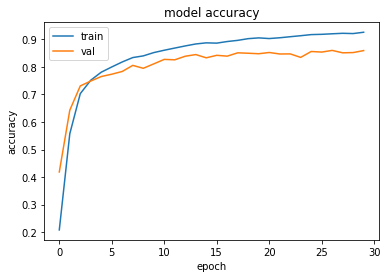

In [ ]:
import keras
from matplotlib import pyplot as plt
# es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, train_label, validation_split = 0.1, epochs=30, shuffle=True, batch_size=512)#, callbacks=[es_callback])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(X_test, test_label, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.7618926763534546
Test accuracy: 0.7721925377845764


# CNN Keras Documentation

In [ ]:
! pip install keras-tuner
import kerastuner as kt
# from kerastuner.tuners import Hyperband
# from kerastuner import HyperModel

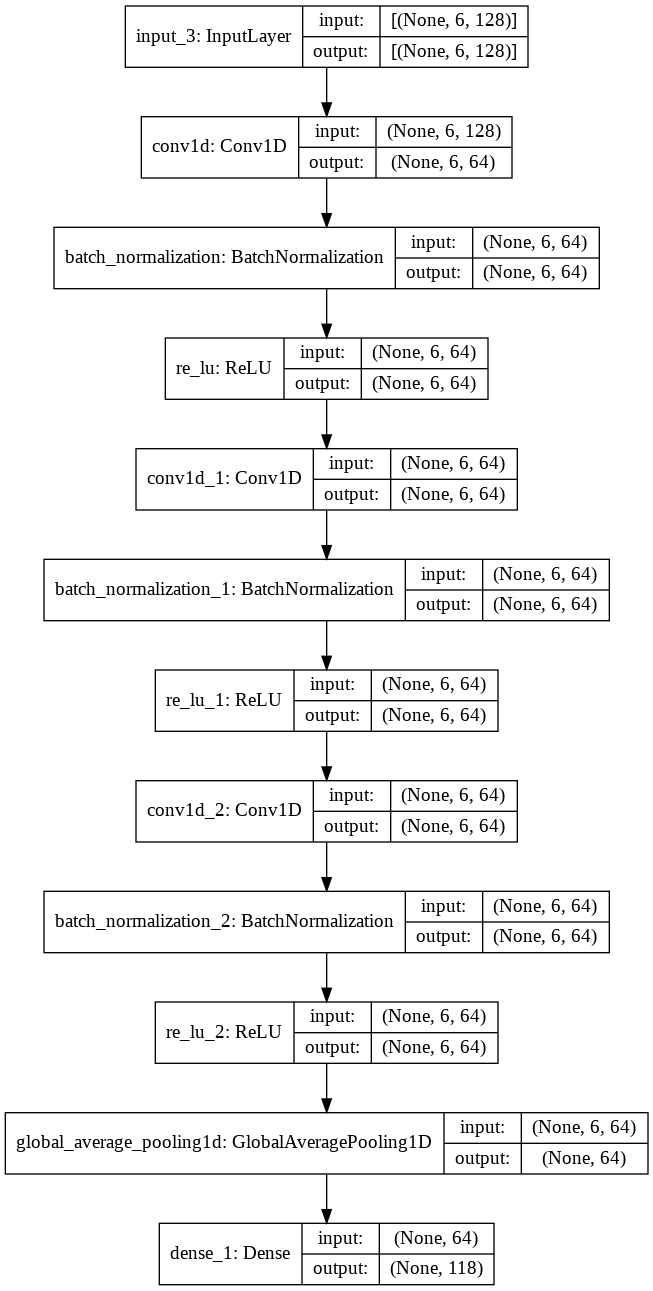

In [ ]:
def make_model(hp):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_train.shape[1:])
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 500
batch_size = 512

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "/content/drive/Shareddrives/MMH/models/best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)
history = model.fit(
    X_train,
    train_label,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.1,
    verbose=1,
)

Epoch 1/500
932/932 [==============================] - 32s 5ms/step - loss: 1.9518 - accuracy: 0.6154 - val_loss: 0.7516 - val_accuracy: 0.8448
Epoch 2/500
932/932 [==============================] - 5s 5ms/step - loss: 0.5369 - accuracy: 0.8794 - val_loss: 0.4980 - val_accuracy: 0.8810
Epoch 3/500
932/932 [==============================] - 5s 5ms/step - loss: 0.3564 - accuracy: 0.9153 - val_loss: 0.4636 - val_accuracy: 0.8873
Epoch 4/500
932/932 [==============================] - 5s 5ms/step - loss: 0.2773 - accuracy: 0.9319 - val_loss: 0.3231 - val_accuracy: 0.9206
Epoch 5/500
932/932 [==============================] - 5s 5ms/step - loss: 0.2283 - accuracy: 0.9399 - val_loss: 0.3543 - val_accuracy: 0.9115
Epoch 6/500
932/932 [==============================] - 5s 5ms/step - loss: 0.1960 - accuracy: 0.9490 - val_loss: 0.3231 - val_accuracy: 0.9194
Epoch 7/500
932/932 [==============================] - 5s 5ms/step - loss: 0.1671 - accuracy: 0.9550 - val_loss: 0.3170 - val_accuracy: 0.926

117/117 [==============================] - 0s 3ms/step - loss: 0.8140 - accuracy: 0.8824


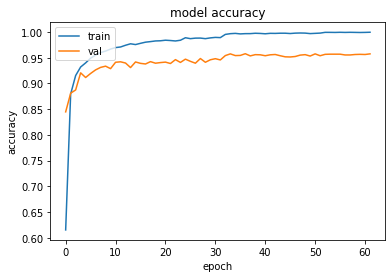

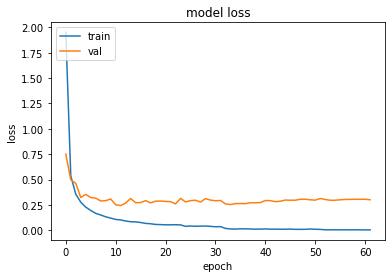

Test accuracy 0.8823529481887817
Test loss 0.8139805197715759


In [ ]:
model = keras.models.load_model("/content/drive/Shareddrives/MMH/models/best_model.h5")

test_loss, test_acc = model.evaluate(X_test, test_label)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
print("Test accuracy", test_acc)
print("Test loss", test_loss)

# Tuned CNN

In [ ]:
from kerastuner.tuners import RandomSearch
from tensorflow import keras
def make_model(hp):
    input_layer = keras.layers.Input(shape=[6, 128])

    conv1 = keras.layers.Conv1D(filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16), kernel_size=hp.Choice('conv_1_kernel', values = [3,5,7,8,9]), padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=hp.Int('conv_2_filter', min_value=32, max_value=128, step=16), kernel_size=hp.Choice('conv_2_kernel', values = [3,5,7,8,9]), padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=hp.Int('conv_3_filter', min_value=32, max_value=128, step=16), kernel_size=hp.Choice('conv_3_kernel', values = [3,5,7,8,9]), padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(20, activation="softmax")(gap)

    model =  keras.models.Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 3*1e-3, 3*1e-4, 1e-4])), \
                  loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
tuner = RandomSearch(
    make_model,
    objective='val_accuracy',
    max_trials=5,
    directory='output',
    project_name='TIFS20')

tuner.search(X_train, train_label, epochs=50, validation_split=0.1)

Trial 5 Complete [00h 05m 12s]
val_accuracy: 0.9848895072937012

Best val_accuracy So Far: 0.9866937398910522
Total elapsed time: 00h 29m 31s
INFO:tensorflow:Oracle triggered exit


In [ ]:
model = tuner.get_best_models(num_models=1)[0]
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 6, 128)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 6, 112)            100464    
_________________________________________________________________
batch_normalization (BatchNo (None, 6, 112)            448       
_________________________________________________________________
re_lu (ReLU)                 (None, 6, 112)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 6, 64)             21568     
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 64)             256       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 6, 64)             0     

In [ ]:
# model = keras.models.load_model('/content/drive/Shareddrives/MMH/models/cnn_best_23_47pm.h5')

Epoch 1/100
78/78 [==============================] - 2s 14ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 0.1063 - val_accuracy: 0.9844
Epoch 2/100
78/78 [==============================] - 1s 8ms/step - loss: 7.8487e-04 - accuracy: 0.9999 - val_loss: 0.1006 - val_accuracy: 0.9862
Epoch 3/100
78/78 [==============================] - 1s 8ms/step - loss: 5.4279e-04 - accuracy: 1.0000 - val_loss: 0.0996 - val_accuracy: 0.9862
Epoch 4/100
78/78 [==============================] - 1s 8ms/step - loss: 4.0816e-04 - accuracy: 1.0000 - val_loss: 0.0993 - val_accuracy: 0.9867
Epoch 5/100
78/78 [==============================] - 1s 8ms/step - loss: 3.2763e-04 - accuracy: 1.0000 - val_loss: 0.0994 - val_accuracy: 0.9869
Epoch 6/100
78/78 [==============================] - 1s 8ms/step - loss: 2.8843e-04 - accuracy: 1.0000 - val_loss: 0.0993 - val_accuracy: 0.9867
Epoch 7/100
78/78 [==============================] - 1s 8ms/step - loss: 2.5563e-04 - accuracy: 1.0000 - val_loss: 0.0993 - val_accur

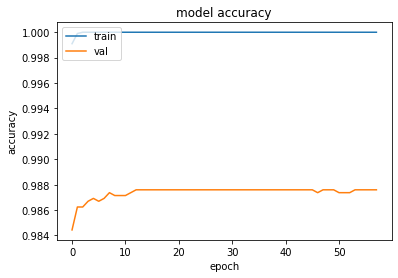

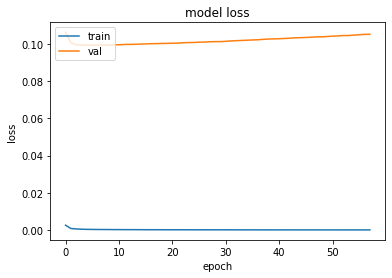

In [ ]:
history = model.fit(X_train, train_label, validation_split = 0.1, epochs=100, shuffle=True, batch_size=512, callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50))#, callbacks=[es_callback])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(X_test, test_label, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4942272901535034
Test accuracy: 0.9590761661529541


In [ ]:
model.save('/content/drive/Shareddrives/MMH/models/cnn_best_23_47pm.h5')

# LSTM

In [ ]:
def base_lstm_model(input_seq):
    # model = Sequential()
    processed = LSTM(256, input_shape=(6, 128))(input_seq)
    activated = (Dense(118, activation='sigmoid'))(processed)
    model = Model(inputs=input_seq, outputs=activated)
    return model
input_seq = Input(shape=(6, 128))
model = base_lstm_model(input_seq)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 6, 128)]          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               394240    
_________________________________________________________________
dense_2 (Dense)              (None, 118)               30326     
Total params: 424,566
Trainable params: 424,566
Non-trainable params: 0
_________________________________________________________________


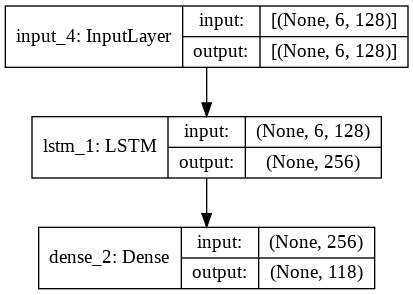

In [ ]:
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
X_test.shape

(3740, 6, 128)

Epoch 1/100
59/59 [==============================] - 2s 14ms/step - loss: 2.5896 - accuracy: 0.5023 - val_loss: 0.9977 - val_accuracy: 0.8088
Epoch 2/100
59/59 [==============================] - 0s 7ms/step - loss: 0.6846 - accuracy: 0.8632 - val_loss: 0.5552 - val_accuracy: 0.8840
Epoch 3/100
59/59 [==============================] - 0s 6ms/step - loss: 0.3868 - accuracy: 0.9182 - val_loss: 0.4241 - val_accuracy: 0.9052
Epoch 4/100
59/59 [==============================] - 0s 6ms/step - loss: 0.2588 - accuracy: 0.9472 - val_loss: 0.3613 - val_accuracy: 0.9151
Epoch 5/100
59/59 [==============================] - 0s 6ms/step - loss: 0.1812 - accuracy: 0.9650 - val_loss: 0.3345 - val_accuracy: 0.9236
Epoch 6/100
59/59 [==============================] - 0s 6ms/step - loss: 0.1332 - accuracy: 0.9763 - val_loss: 0.3053 - val_accuracy: 0.9287
Epoch 7/100
59/59 [==============================] - 0s 6ms/step - loss: 0.0959 - accuracy: 0.9850 - val_loss: 0.2929 - val_accuracy: 0.9281
Epoch 8/100


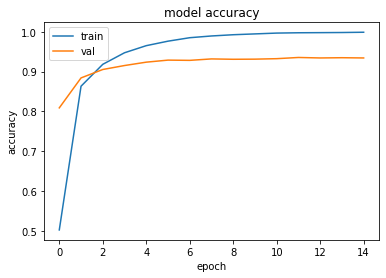

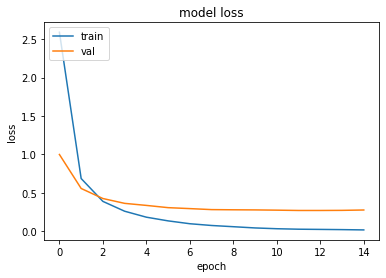

In [ ]:
from matplotlib import pyplot as plt
# es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, train_label, validation_split = 0.1, epochs=100, shuffle=True, batch_size=512, callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3))#, callbacks=[es_callback])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(X_test, test_label, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7529956698417664
Test accuracy: 0.8660427927970886


# Tuned LSTM

In [ ]:
batch_size

512

In [ ]:
def tuned_lstm_model(hp):
    # model = Sequential()
    input_seq = Input(shape=(6, 128))
    processed = LSTM(hp.Int('units', min_value=32, max_value=512, step=32), input_shape=(6, 128))(input_seq)
    # x = (Dense(118*8, activation='relu'))(processed)
    # x = (Dense(118*4, activation='relu'))(x)
    # x = (Dense(118*2, activation='relu'))(x)
    activated = (Dense(118, activation='sigmoid'))(processed)
    model = Model(inputs=input_seq, outputs=activated)
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3, 3*1e-1, 3*1e-2, 3*1e-3, 3*1e-4, 1e-4, 1.0, 10.0, 100.0])), \
                  loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
tuner = RandomSearch(
    tuned_lstm_model,
    objective='val_accuracy',
    max_trials=10,
    directory='output',
    project_name='TIFS20')

tuner.search(X_train, train_label, epochs=50, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Trial 10 Complete [00h 04m 11s]
val_accuracy: 0.9247961044311523

Best val_accuracy So Far: 0.9247961044311523
Total elapsed time: 00h 44m 44s
INFO:tensorflow:Oracle triggered exit


In [ ]:
model = tuner.get_best_models(num_models=1)[0]
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 6, 128)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 118)               15222     
Total params: 146,806
Trainable params: 146,806
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, train_label, validation_split = 0.1, epochs=100, shuffle=True, batch_size=512, callbacks=[EarlyStopping('val_loss', patience=30)])#, callbacks=[es_callback])

Epoch 1/100
59/59 [==============================] - 3s 19ms/step - loss: 0.0019 - accuracy: 0.9999 - val_loss: 0.3987 - val_accuracy: 0.9257
Epoch 2/100
59/59 [==============================] - 1s 10ms/step - loss: 0.0017 - accuracy: 0.9999 - val_loss: 0.3985 - val_accuracy: 0.9272
Epoch 3/100
59/59 [==============================] - 1s 11ms/step - loss: 0.0015 - accuracy: 0.9999 - val_loss: 0.3982 - val_accuracy: 0.9266
Epoch 4/100
59/59 [==============================] - 1s 10ms/step - loss: 0.0015 - accuracy: 0.9999 - val_loss: 0.3979 - val_accuracy: 0.9269
Epoch 5/100
59/59 [==============================] - 1s 10ms/step - loss: 0.0014 - accuracy: 0.9999 - val_loss: 0.3978 - val_accuracy: 0.9269
Epoch 6/100
59/59 [==============================] - 1s 10ms/step - loss: 0.0014 - accuracy: 0.9999 - val_loss: 0.3976 - val_accuracy: 0.9269
Epoch 7/100
59/59 [==============================] - 1s 10ms/step - loss: 0.0014 - accuracy: 0.9999 - val_loss: 0.3975 - val_accuracy: 0.9266
Epoch 

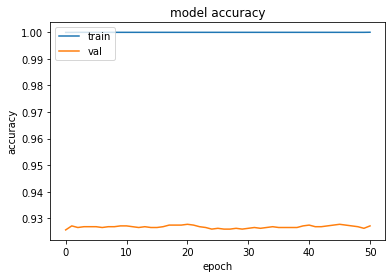

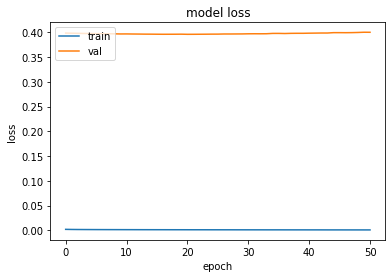

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(X_test, test_label, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.132544755935669
Test accuracy: 0.8516042828559875


In [ ]:
model.save('/content/drive/Shareddrives/MMH/models/tuned_lstm_87.h5')

# CNN + LSTM (Sequential)

In [ ]:
X_train = load_X('/content/drive/Shareddrives/MMH/TIFS20/Dataset #1/train/Inertial Signals')
X_test = load_X('/content/drive/Shareddrives/MMH/TIFS20/Dataset #1/test/Inertial Signals')
train_label = load_y('/content/drive/Shareddrives/MMH/TIFS20/Dataset #1/train/y_train.txt')
test_label = load_y('/content/drive/Shareddrives/MMH/TIFS20/Dataset #1/test/y_test.txt')
X_train.shape

(33104, 6, 128, 1)

In [ ]:
def cnn():
    input_layer = Input(shape=[6, 128])
    tf.random.set_seed(0)
    conv1 = Conv1D(filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16), kernel_size=hp.Choice('conv_1_kernel', values = [3,5,7,8,9]), padding="same")(input_layer)
    conv1 = BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
    

    conv2 = Conv1D(filters=hp.Int('conv_2_filter', min_value=32, max_value=128, step=16), kernel_size=hp.Choice('conv_2_kernel', values = [3,5,7,8,9]), padding="same")(conv1)
    conv2 = BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = Conv1D(filters=hp.Int('conv_3_filter', min_value=32, max_value=128, step=16), kernel_size=hp.Choice('conv_3_kernel', values = [3,5,7,8,9]), padding="same")(conv2)
    conv3 = BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalMaxPooling1D()(conv3)
    gap = Dropout(.2, input_shape=(96,))(gap)
    gap = LSTM(hp.Int('units', min_value=32, max_value=512, step=32), input_shape=(None, None, 32))(gap)
    gap = keras.layers.Flatten()
    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    model =  keras.models.Model(inputs=input_layer, outputs=output_layer)
    model.summary()
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 3*1e-3, 3*1e-4, 1e-4])), \
                  loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
def cnn_lstm_sequential(hp):
    input_layer = Input(shape=[X_train.shape[1], X_train.shape[2], X_train.shape[3]])
    x = Conv2D(filters=32, kernel_size=(1,9), strides=(1,2), padding='same', activation='relu', kernel_initializer='truncated_normal', bias_initializer='constant')(input_layer)
    x = MaxPool2D(pool_size=(1,2), strides=(1,2), padding='valid')(x)
    x = Conv2D(filters=64, kernel_size=(1,3), strides=(1,1), padding='same', activation='relu', kernel_initializer='truncated_normal', bias_initializer='constant')(x)
    x = Conv2D(filters=128, kernel_size=(1,3), strides=(1,1), padding='same', activation='relu', kernel_initializer='truncated_normal', bias_initializer='constant')(x)
    x = MaxPool2D(pool_size=(1,2), strides=(1,2), padding='valid')(x)
    x = Conv2D(filters=128, kernel_size=(6,1), strides=(6,1), padding='valid', activation='relu', kernel_initializer='truncated_normal', bias_initializer='constant')(x)
    # x = Flatten()(x)
    
    x = Reshape((1, x.shape[2], x.shape[3]))(x)
    num_lstm_layers = 2
    num_units = hp.Int('units', min_value=32, max_value=1024, step=16)
    cells = [LSTMCell(num_units) for _ in range(num_lstm_layers)]
    rnn = StackedRNNCells(cells)
    lstm = RNN(rnn)
    x = lstm(x)
    x = Flatten()(x)
    x = Dense(units=118, activation='softmax', kernel_initializer='truncated_normal', bias_initializer='constant')(x)
    # output_layer = Dense(num_classes, activation="softmax")(lstm_output)
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1.0, 0.3, 0.1, 3*1e-2, 1e-2, 1e-3, 3*1e-3, 3*1e-4, 1e-4])), \
                  loss='categorical_crossentropy',metrics=['accuracy'])
    return Model(inputs=input_layer, outputs=x)


In [ ]:
tuner = RandomSearch(
    cnn_lstm_sequential,
    objective='val_accuracy',
    max_trials=20,
    directory='output',
    project_name='TIFS20')

tuner.search(X_train, train_label, epochs=100, validation_split=0.1)

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Dimensions must be equal, but are 128 and 32 for '{{node rnn/stacked_rnn_cells/lstm_cell/mul/mul}} = Mul[T=DT_FLOAT](rnn/stacked_rnn_cells/lstm_cell/Sigmoid_1, rnn/zeros_1)' with input shapes: [?,4,128], [?,32].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/math_ops.py", line 1245, in binary_op_wrapper
    out = r_op(x)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/math_ops.py", line 1267, in r_binary_op_wrapper
    return func(x, y, name=name)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/math_ops.py", line 1575, in _mul_dispatch
    return multiply(x, y

Invalid model 0/5
Invalid model 1/5


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Dimensions must be equal, but are 128 and 32 for '{{node rnn/stacked_rnn_cells/lstm_cell/mul/mul}} = Mul[T=DT_FLOAT](rnn/stacked_rnn_cells/lstm_cell/Sigmoid_1, rnn/zeros_1)' with input shapes: [?,4,128], [?,32].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/math_ops.py", line 1245, in binary_op_wrapper
    out = r_op(x)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/math_ops.py", line 1267, in r_binary_op_wrapper
    return func(x, y, name=name)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/math_ops.py", line 1575, in _mul_dispatch
    return multiply(x, y

Invalid model 2/5
Invalid model 3/5


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Dimensions must be equal, but are 128 and 32 for '{{node rnn/stacked_rnn_cells/lstm_cell/mul/mul}} = Mul[T=DT_FLOAT](rnn/stacked_rnn_cells/lstm_cell/Sigmoid_1, rnn/zeros_1)' with input shapes: [?,4,128], [?,32].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/math_ops.py", line 1245, in binary_op_wrapper
    out = r_op(x)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/math_ops.py", line 1267, in r_binary_op_wrapper
    return func(x, y, name=name)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/math_ops.py", line 1575, in _mul_dispatch
    return multiply(x, y

Invalid model 4/5
Invalid model 5/5


RuntimeError: ignored

# CNN + LSTM (parallel)

In [ ]:
len(X_train[0])

6

In [ ]:
X_train = load_X('/content/drive/Shareddrives/MMH/TIFS20/Dataset #1/train/Inertial Signals')
X_test = load_X('/content/drive/Shareddrives/MMH/TIFS20/Dataset #1/test/Inertial Signals')
train_label = load_y('/content/drive/Shareddrives/MMH/TIFS20/Dataset #1/train/y_train.txt')
test_label = load_y('/content/drive/Shareddrives/MMH/TIFS20/Dataset #1/test/y_test.txt')
# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

label = Input(shape=[None, 118])
def cnn_lstm_parallel():
    # input = Input(shape=[6, 128])
    input_layer = Input(shape=[X_train.shape[1], X_train.shape[2], X_train.shape[3]])
    input = Reshape((X_train.shape[1], X_train.shape[2]))(input_layer)
    cnn = Conv2D(filters=32, kernel_size=(1,9), strides=(1,2), padding='same', activation='elu', kernel_initializer='truncated_normal', bias_initializer='constant')(input_layer)
    cnn = MaxPool2D(pool_size=(1,2), strides=(1,2), padding='same')(cnn)
    cnn = Conv2D(filters=64, kernel_size=(1,3), strides=(1,1), padding='same', activation='elu', kernel_initializer='truncated_normal', bias_initializer='constant')(cnn)
    cnn = Conv2D(filters=128, kernel_size=(1,3), strides=(1,1), padding='same', activation='elu', kernel_initializer='truncated_normal', bias_initializer='constant')(cnn)
    cnn = MaxPool2D(pool_size=(1,2), strides=(1,2), padding='same')(cnn)
    cnn = Conv2D(filters=128, kernel_size=(6,1), strides=(6,1), padding='same', activation='elu', kernel_initializer='truncated_normal', bias_initializer='constant')(cnn)
    cnn = Flatten()(cnn)
    # num_steps = len(X_train[0]) # X_train[0]
    num_lstm_layers = 2
    num_units = 1024
    # num_inputs = len(X_train[0][0])
    input_layer_lstm = input
    # input_layer_lstm = tf.transpose(input_layer_lstm, [1, 0, 2])
    # input_layer_lstm = tf.reshape(input_layer_lstm, [-1, num_inputs]) # 128 = X_train[0][0]
    # w_hidden = tf.Variable(tf.random.normal([num_inputs, num_units]))
    # bias_hidden = tf.Variable(tf.random.normal([num_units], mean=1.0))
    # input_layer_lstm = tf.nn.relu(tf.matmul(input_layer_lstm, (w_hidden+bias_hidden)))
    # input_layer_lstm = tf.split(input_layer_lstm, num_steps,0)
    
    # input_la
    
    cells = [LSTMCell(num_units) for _ in range(num_lstm_layers)]
    rnn = StackedRNNCells(cells)
    lstm = RNN(rnn)
    lstm_output = lstm(input)
    lstm_output = Flatten()(lstm_output)
    result = concatenate([cnn, lstm_output])
    result = Dense(units=118, activation='softmax', kernel_initializer='truncated_normal', bias_initializer='constant')(result)
    model =  Model(inputs=[input_layer], outputs=result)
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")
    model.summary()
    return model
model = cnn_lstm_parallel()
# tuner = RandomSearch(
#     CNN_lstm,
#     objective='val_accuracy',
#     max_trials=10,
#     directory='output_cnn_lstm',
#     project_name='TIFS20')


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 6, 128, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 6, 64, 32)    320         input_13[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_6 (MaxPooling2D)  (None, 6, 32, 32)    0           conv2d_13[0][0]                  
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 6, 32, 64)    6208        max_pooling2d_6[0][0]            
____________________________________________________________________________________________

Epoch 1/100
59/59 [==============================] - 39s 107ms/step - loss: 0.9045 - accuracy: 0.7923 - val_loss: 0.2800 - val_accuracy: 0.9342
Epoch 2/100
59/59 [==============================] - 6s 98ms/step - loss: 0.1535 - accuracy: 0.9603 - val_loss: 0.1858 - val_accuracy: 0.9568
Epoch 3/100
59/59 [==============================] - 6s 99ms/step - loss: 0.0677 - accuracy: 0.9818 - val_loss: 0.1625 - val_accuracy: 0.9601
Epoch 4/100
59/59 [==============================] - 6s 100ms/step - loss: 0.0364 - accuracy: 0.9896 - val_loss: 0.1605 - val_accuracy: 0.9638
Epoch 5/100
59/59 [==============================] - 6s 100ms/step - loss: 0.0189 - accuracy: 0.9948 - val_loss: 0.1628 - val_accuracy: 0.9625
Epoch 6/100
59/59 [==============================] - 6s 101ms/step - loss: 0.0197 - accuracy: 0.9945 - val_loss: 0.1726 - val_accuracy: 0.9650
Epoch 7/100
59/59 [==============================] - 6s 102ms/step - loss: 0.0082 - accuracy: 0.9982 - val_loss: 0.1771 - val_accuracy: 0.9619


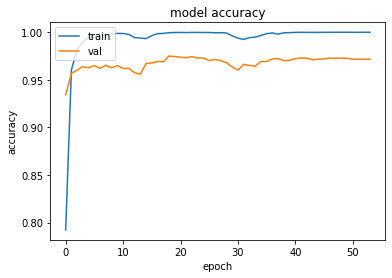

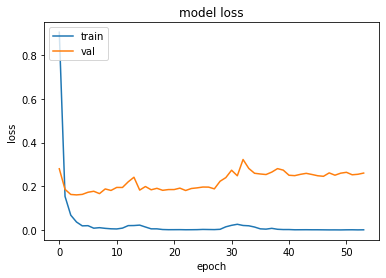

In [ ]:
history = model.fit(X_train, train_label, validation_split = 0.1, epochs=100, shuffle=True, batch_size=512, callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50))#, callbacks=[es_callback])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(X_test, test_label, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.126646637916565
Test accuracy: 0.9245989322662354


In [ ]:
model.save('/content/drive/Shareddrives/MMH/models/cnn_lstm_parallel_unfrozed_92point46.h5')

# LSTM-FCN

In [ ]:
! pip install keras-tuner
import keras as K
from keras.layers import Input
from keras.applications import VGG19
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Dropout, Input, Concatenate, GlobalMaxPool1D, LSTM, MaxPool1D
from keras.layers import ReLU, BatchNormalization, Bidirectional, concatenate, Reshape, TimeDistributed
from keras.layers import Conv2D, ConvLSTM2D, MaxPool2D, SpatialDropout2D, Softmax, ELU, Layer, Masking
from keras.layers import GlobalAveragePooling2D, GlobalMaxPool2D, LeakyReLU, LSTMCell, RNN, InputSpec
from keras.layers import concatenate, Conv1DTranspose, Conv2DTranspose, Flatten, StackedRNNCells
from keras.initializers import Constant
from keras.models import Model
from keras import Input
# from tensorflow import keras as keras
from keras.optimizers import Adam, SGD, RMSprop
from matplotlib import pyplot as plt
import kerastuner as kt
from kerastuner.tuners import RandomSearch, BayesianOptimization, Hyperband
from keras.callbacks import EarlyStopping
from keras.layers import GlobalAveragePooling2D, GlobalAveragePooling1D, Permute, multiply, Activation
import keras.backend as K

from keras import backend as K
from keras import activations
from keras import initializers
from keras import regularizers
from keras import constraints

     |████████████████████████████████| 102kB 7.2MB/s 
  Created wheel for kt-legacy: filename=kt_legacy-1.0.3-cp37-none-any.whl size=9569 sha256=6230f03c3df305393c8ca637638928ec44913ff76cad499398867cab51671c2b
  Stored in directory: /root/.cache/pip/wheels/95/99/a8/6b116b0f69be60cc475d1cd36680f3a09f284d86655bb99d93
Successfully built kt-legacy


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.


In [ ]:
def squeeze_excite_block(tensor, ratio=16):
    init = tensor
    # channel_axis = 1 if K.image_data_format() == "channels_first" else -1
    filters = init.shape[-1]
    se_shape = (1, filters)

    se = GlobalAveragePooling1D()(init)
    se = Reshape(se_shape)(se)
    se = Dense(filters // ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)

    # if K.image_data_format() == 'channels_first':
    #     se = Permute((3, 1, 2))(se)

    x = multiply([init, se])
    return x


def _time_distributed_dense(x, w, b=None, dropout=None,
                            input_dim=None, output_dim=None,
                            timesteps=None, training=None):
    """Apply `y . w + b` for every temporal slice y of x.
    # Arguments
        x: input tensor.
        w: weight matrix.
        b: optional bias vector.
        dropout: wether to apply dropout (same dropout mask
            for every temporal slice of the input).
        input_dim: integer; optional dimensionality of the input.
        output_dim: integer; optional dimensionality of the output.
        timesteps: integer; optional number of timesteps.
        training: training phase tensor or boolean.
    # Returns
        Output tensor.
    """
    if not input_dim:
        input_dim = K.shape(x)[2]
    if not timesteps:
        timesteps = K.shape(x)[1]
    if not output_dim:
        output_dim = K.int_shape(w)[1]

    if dropout is not None and 0. < dropout < 1.:
        # apply the same dropout pattern at every timestep
        ones = K.ones_like(K.reshape(x[:, 0, :], (-1, input_dim)))
        dropout_matrix = K.dropout(ones, dropout)
        expanded_dropout_matrix = K.repeat(dropout_matrix, timesteps)
        x = K.in_train_phase(x * expanded_dropout_matrix, x, training=training)

    # collapse time dimension and batch dimension together
    x = K.reshape(x, (-1, input_dim))
    x = K.dot(x, w)
    if b is not None:
        x = K.bias_add(x, b)
    # reshape to 3D tensor
    if K.backend() == 'tensorflow':
        x = K.reshape(x, K.stack([-1, timesteps, output_dim]))
        x.set_shape([None, None, output_dim])
    else:
        x = K.reshape(x, (-1, timesteps, output_dim))
    return x


class AttentionLSTM(RNN):
    """Long-Short Term Memory unit - with Attention.
    # Arguments
        units: Positive integer, dimensionality of the output space.
        activation: Activation function to use
            (see [activations](keras/activations.md)).
            If you pass None, no activation is applied
            (ie. "linear" activation: `a(x) = x`).
        recurrent_activation: Activation function to use
            for the recurrent step
            (see [activations](keras/activations.md)).
        attention_activation: Activation function to use
            for the attention step. If you pass None, no activation is applied
            (ie. "linear" activation: `a(x) = x`).
            (see [activations](keras/activations.md)).
        use_bias: Boolean, whether the layer uses a bias vector.
        kernel_initializer: Initializer for the `kernel` weights matrix,
            used for the linear transformation of the inputs.
            (see [initializers](../initializers.md)).
        recurrent_initializer: Initializer for the `recurrent_kernel`
            weights matrix,
            used for the linear transformation of the recurrent state.
            (see [initializers](../initializers.md)).
        bias_initializer: Initializer for the bias vector
            (see [initializers](../initializers.md)).
        attention_initializer: Initializer for the `attention_kernel` weights
            matrix, used for the linear transformation of the inputs.
            (see [initializers](../initializers.md)).
        unit_forget_bias: Boolean.
            If True, add 1 to the bias of the forget gate at initialization.
            Setting it to true will also force `bias_initializer="zeros"`.
            This is recommended in [Jozefowicz et al.](http://www.jmlr.org/proceedings/papers/v37/jozefowicz15.pdf)
        kernel_regularizer: Regularizer function applied to
            the `kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        recurrent_regularizer: Regularizer function applied to
            the `recurrent_kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        bias_regularizer: Regularizer function applied to the bias vector
            (see [regularizer](../regularizers.md)).
        activity_regularizer: Regularizer function applied to
            the output of the layer (its "activation").
            (see [regularizer](../regularizers.md)).
        attention_regularizer: Regularizer function applied to
            the `attention_kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        kernel_constraint: Constraint function applied to
            the `kernel` weights matrix
            (see [constraints](../constraints.md)).
        recurrent_constraint: Constraint function applied to
            the `recurrent_kernel` weights matrix
            (see [constraints](../constraints.md)).
        bias_constraint: Constraint function applied to the bias vector
            (see [constraints](../constraints.md)).
        attention_constraint: Constraint function applied to
            the `attention_kernel` weights matrix
            (see [constraints](../constraints.md)).
        dropout: Float between 0 and 1.
            Fraction of the units to drop for
            the linear transformation of the inputs.
        recurrent_dropout: Float between 0 and 1.
            Fraction of the units to drop for
            the linear transformation of the recurrent state.
        return_attention: Returns the attention vector instead of
            the internal state.
    # References
        - [Long short-term memory](http://deeplearning.cs.cmu.edu/pdfs/Hochreiter97_lstm.pdf) (original 1997 paper)
        - [Learning to forget: Continual prediction with LSTM](http://www.mitpressjournals.org/doi/pdf/10.1162/089976600300015015)
        - [Supervised sequence labeling with recurrent neural networks](http://www.cs.toronto.edu/~graves/preprint.pdf)
        - [A Theoretically Grounded Application of Dropout in Recurrent Neural Networks](http://arxiv.org/abs/1512.05287)
        - [Bahdanau, Cho & Bengio (2014), "Neural Machine Translation by Jointly Learning to Align and Translate"](https://arxiv.org/pdf/1409.0473.pdf)
        - [Xu, Ba, Kiros, Cho, Courville, Salakhutdinov, Zemel & Bengio (2016), "Show, Attend and Tell: Neural Image Caption Generation with Visual Attention"](http://arxiv.org/pdf/1502.03044.pdf)
    """
    @interfaces.legacy_recurrent_support
    def __init__(self, units,
                 activation='tanh',
                 recurrent_activation='hard_sigmoid',
                 attention_activation='tanh',
                 use_bias=True,
                 kernel_initializer='glorot_uniform',
                 recurrent_initializer='orthogonal',
                 attention_initializer='orthogonal',
                 bias_initializer='zeros',
                 unit_forget_bias=True,
                 kernel_regularizer=None,
                 recurrent_regularizer=None,
                 bias_regularizer=None,
                 activity_regularizer=None,
                 attention_regularizer=None,
                 kernel_constraint=None,
                 recurrent_constraint=None,
                 bias_constraint=None,
                 attention_constraint=None,
                 dropout=0.,
                 recurrent_dropout=0.,
                 return_attention=False,
                 implementation=1,
                 **kwargs):
        super(AttentionLSTM, self).__init__(**kwargs)
        self.units = units
        self.activation = activations.get(activation)
        self.recurrent_activation = activations.get(recurrent_activation)
        self.attention_activation = activations.get(attention_activation)
        self.use_bias = use_bias

        self.kernel_initializer = initializers.get(kernel_initializer)
        self.recurrent_initializer = initializers.get(recurrent_initializer)
        self.attention_initializer = initializers.get(attention_initializer)
        self.bias_initializer = initializers.get(bias_initializer)
        self.unit_forget_bias = unit_forget_bias

        self.kernel_regularizer = regularizers.get(kernel_regularizer)
        self.recurrent_regularizer = regularizers.get(recurrent_regularizer)
        self.bias_regularizer = regularizers.get(bias_regularizer)
        self.activity_regularizer = regularizers.get(activity_regularizer)
        self.attention_regularizer = regularizers.get(attention_regularizer)

        self.kernel_constraint = constraints.get(kernel_constraint)
        self.recurrent_constraint = constraints.get(recurrent_constraint)
        self.bias_constraint = constraints.get(bias_constraint)
        self.attention_constraint = constraints.get(attention_constraint)

        self.dropout = min(1., max(0., dropout))
        self.recurrent_dropout = min(1., max(0., recurrent_dropout))
        self.return_attention = return_attention
        self.state_spec = [InputSpec(shape=(None, self.units)),
                           InputSpec(shape=(None, self.units))]
        self.implementation = implementation

    def build(self, input_shape):
        if isinstance(input_shape, list):
            input_shape = input_shape[0]

        batch_size = input_shape[0] if self.stateful else None
        self.timestep_dim = input_shape[1]
        self.input_dim = input_shape[2]
        self.input_spec[0] = InputSpec(shape=(batch_size, None, self.input_dim))

        self.states = [None, None]
        if self.stateful:
            self.reset_states()

        self.kernel = self.add_weight(shape=(self.input_dim, self.units * 4),
                                      name='kernel',
                                      initializer=self.kernel_initializer,
                                      regularizer=self.kernel_regularizer,
                                      constraint=self.kernel_constraint)
        self.recurrent_kernel = self.add_weight(
            shape=(self.units, self.units * 4),
            name='recurrent_kernel',
            initializer=self.recurrent_initializer,
            regularizer=self.recurrent_regularizer,
            constraint=self.recurrent_constraint)

        # add attention kernel
        self.attention_kernel = self.add_weight(
            shape=(self.input_dim, self.units * 4),
            name='attention_kernel',
            initializer=self.attention_initializer,
            regularizer=self.attention_regularizer,
            constraint=self.attention_constraint)

        # add attention weights
        # weights for attention model
        self.attention_weights = self.add_weight(shape=(self.input_dim, self.units),
                                                 name='attention_W',
                                                 initializer=self.attention_initializer,
                                                 regularizer=self.attention_regularizer,
                                                 constraint=self.attention_constraint)

        self.attention_recurrent_weights = self.add_weight(shape=(self.units, self.units),
                                                           name='attention_U',
                                                           initializer=self.recurrent_initializer,
                                                           regularizer=self.recurrent_regularizer,
                                                           constraint=self.recurrent_constraint)

        if self.use_bias:
            if self.unit_forget_bias:
                def bias_initializer(shape, *args, **kwargs):
                    return K.concatenate([
                        self.bias_initializer((self.units,), *args, **kwargs),
                        initializers.Ones()((self.units,), *args, **kwargs),
                        self.bias_initializer((self.units * 2,), *args, **kwargs),
                    ])
            else:
                bias_initializer = self.bias_initializer
            self.bias = self.add_weight(shape=(self.units * 4,),
                                        name='bias',
                                        initializer=self.bias_initializer,
                                        regularizer=self.bias_regularizer,
                                        constraint=self.bias_constraint)

            self.attention_bias = self.add_weight(shape=(self.units,),
                                                  name='attention_b',
                                                  initializer=self.bias_initializer,
                                                  regularizer=self.bias_regularizer,
                                                  constraint=self.bias_constraint)

            self.attention_recurrent_bias = self.add_weight(shape=(self.units, 1),
                                                            name='attention_v',
                                                            initializer=self.bias_initializer,
                                                            regularizer=self.bias_regularizer,
                                                            constraint=self.bias_constraint)
        else:
            self.bias = None
            self.attention_bias = None
            self.attention_recurrent_bias = None

        self.kernel_i = self.kernel[:, :self.units]
        self.kernel_f = self.kernel[:, self.units: self.units * 2]
        self.kernel_c = self.kernel[:, self.units * 2: self.units * 3]
        self.kernel_o = self.kernel[:, self.units * 3:]

        self.recurrent_kernel_i = self.recurrent_kernel[:, :self.units]
        self.recurrent_kernel_f = self.recurrent_kernel[:, self.units: self.units * 2]
        self.recurrent_kernel_c = self.recurrent_kernel[:, self.units * 2: self.units * 3]
        self.recurrent_kernel_o = self.recurrent_kernel[:, self.units * 3:]

        self.attention_i = self.attention_kernel[:, :self.units]
        self.attention_f = self.attention_kernel[:, self.units: self.units * 2]
        self.attention_c = self.attention_kernel[:, self.units * 2: self.units * 3]
        self.attention_o = self.attention_kernel[:, self.units * 3:]

        if self.use_bias:
            self.bias_i = self.bias[:self.units]
            self.bias_f = self.bias[self.units: self.units * 2]
            self.bias_c = self.bias[self.units * 2: self.units * 3]
            self.bias_o = self.bias[self.units * 3:]
        else:
            self.bias_i = None
            self.bias_f = None
            self.bias_c = None
            self.bias_o = None

        self.built = True

    def preprocess_input(self, inputs, training=None):
        return inputs

    def get_constants(self, inputs, training=None):
        constants = []
        if self.implementation != 0 and 0 < self.dropout < 1:
            input_shape = K.int_shape(inputs)
            input_dim = input_shape[-1]
            ones = K.ones_like(K.reshape(inputs[:, 0, 0], (-1, 1)))
            ones = K.tile(ones, (1, int(input_dim)))

            def dropped_inputs():
                return K.dropout(ones, self.dropout)

            dp_mask = [K.in_train_phase(dropped_inputs,
                                        ones,
                                        training=training) for _ in range(4)]
            constants.append(dp_mask)
        else:
            constants.append([K.cast_to_floatx(1.) for _ in range(4)])

        if 0 < self.recurrent_dropout < 1:
            ones = K.ones_like(K.reshape(inputs[:, 0, 0], (-1, 1)))
            ones = K.tile(ones, (1, self.units))

            def dropped_inputs():
                return K.dropout(ones, self.recurrent_dropout)
            rec_dp_mask = [K.in_train_phase(dropped_inputs,
                                            ones,
                                            training=training) for _ in range(4)]
            constants.append(rec_dp_mask)
        else:
            constants.append([K.cast_to_floatx(1.) for _ in range(4)])

        # append the input as well for use later
        constants.append(inputs)
        return constants

    def step(self, inputs, states):
        h_tm1 = states[0]
        c_tm1 = states[1]
        dp_mask = states[2]
        rec_dp_mask = states[3]
        x_input = states[4]

        # alignment model
        h_att = K.repeat(h_tm1, self.timestep_dim)
        att = _time_distributed_dense(x_input, self.attention_weights, self.attention_bias,
                                      output_dim=K.int_shape(self.attention_weights)[1])
        attention_ = self.attention_activation(K.dot(h_att, self.attention_recurrent_weights) + att)
        attention_ = K.squeeze(K.dot(attention_, self.attention_recurrent_bias), 2)

        alpha = K.exp(attention_)

        if dp_mask is not None:
            alpha *= dp_mask[0]

        alpha /= K.sum(alpha, axis=1, keepdims=True)
        alpha_r = K.repeat(alpha, self.input_dim)
        alpha_r = K.permute_dimensions(alpha_r, (0, 2, 1))

        # make context vector (soft attention after Bahdanau et al.)
        z_hat = x_input * alpha_r
        context_sequence = z_hat
        z_hat = K.sum(z_hat, axis=1)

        if self.implementation == 2:
            z = K.dot(inputs * dp_mask[0], self.kernel)
            z += K.dot(h_tm1 * rec_dp_mask[0], self.recurrent_kernel)
            z += K.dot(z_hat, self.attention_kernel)

            if self.use_bias:
                z = K.bias_add(z, self.bias)

            z0 = z[:, :self.units]
            z1 = z[:, self.units: 2 * self.units]
            z2 = z[:, 2 * self.units: 3 * self.units]
            z3 = z[:, 3 * self.units:]

            i = self.recurrent_activation(z0)
            f = self.recurrent_activation(z1)
            c = f * c_tm1 + i * self.activation(z2)
            o = self.recurrent_activation(z3)
        else:
            if self.implementation == 0:
                x_i = inputs[:, :self.units]
                x_f = inputs[:, self.units: 2 * self.units]
                x_c = inputs[:, 2 * self.units: 3 * self.units]
                x_o = inputs[:, 3 * self.units:]
            elif self.implementation == 1:
                x_i = K.dot(inputs * dp_mask[0], self.kernel_i) + self.bias_i
                x_f = K.dot(inputs * dp_mask[1], self.kernel_f) + self.bias_f
                x_c = K.dot(inputs * dp_mask[2], self.kernel_c) + self.bias_c
                x_o = K.dot(inputs * dp_mask[3], self.kernel_o) + self.bias_o
            else:
                raise ValueError('Unknown `implementation` mode.')

            i = self.recurrent_activation(x_i + K.dot(h_tm1 * rec_dp_mask[0], self.recurrent_kernel_i)
                                              + K.dot(z_hat, self.attention_i))
            f = self.recurrent_activation(x_f + K.dot(h_tm1 * rec_dp_mask[1], self.recurrent_kernel_f)
                                          + K.dot(z_hat, self.attention_f))
            c = f * c_tm1 + i * self.activation(x_c + K.dot(h_tm1 * rec_dp_mask[2], self.recurrent_kernel_c)
                                                + K.dot(z_hat, self.attention_c))
            o = self.recurrent_activation(x_o + K.dot(h_tm1 * rec_dp_mask[3], self.recurrent_kernel_o)
                                          + K.dot(z_hat, self.attention_o))
        h = o * self.activation(c)
        if 0 < self.dropout + self.recurrent_dropout:
            h._uses_learning_phase = True

        if self.return_attention:
            return context_sequence, [h, c]
        else:
            return h, [h, c]

    def get_config(self):
        config = {'units': self.units,
                  'activation': activations.serialize(self.activation),
                  'recurrent_activation': activations.serialize(self.recurrent_activation),
                  'attention_activation': activations.serialize(self.attention_activation),
                  'use_bias': self.use_bias,
                  'kernel_initializer': initializers.serialize(self.kernel_initializer),
                  'recurrent_initializer': initializers.serialize(self.recurrent_initializer),
                  'bias_initializer': initializers.serialize(self.bias_initializer),
                  'attention_initializer': initializers.serialize(self.attention_initializer),
                  'unit_forget_bias': self.unit_forget_bias,
                  'kernel_regularizer': regularizers.serialize(self.kernel_regularizer),
                  'recurrent_regularizer': regularizers.serialize(self.recurrent_regularizer),
                  'bias_regularizer': regularizers.serialize(self.bias_regularizer),
                  'activity_regularizer': regularizers.serialize(self.activity_regularizer),
                  'attention_regularizer': regularizers.serialize(self.attention_regularizer),
                  'kernel_constraint': constraints.serialize(self.kernel_constraint),
                  'recurrent_constraint': constraints.serialize(self.recurrent_constraint),
                  'bias_constraint': constraints.serialize(self.bias_constraint),
                  'attention_constraint': constraints.serialize(self.attention_constraint),
                  'dropout': self.dropout,
                  'recurrent_dropout': self.recurrent_dropout,
                  'return_attention': self.return_attention}
        base_config = super(AttentionLSTM, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [ ]:
def MLSTM_FCN():
    x = Input(shape=(6, 128))
    ip = x
    x = Masking()(ip)
    x = LSTM(units=8)(x)
    x = Dropout(0.8)(x)
    y = Permute((2, 1))(ip)
    y = Conv1D(128, 8, padding='same', kernel_initializer='he_uniform')(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = squeeze_excite_block(y)
    y = Conv1D(256, 5, padding='same', kernel_initializer='he_uniform')(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = squeeze_excite_block(y)
    y = Conv1D(128, 3, padding='same', kernel_initializer='he_uniform')(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = GlobalAveragePooling1D()(y)
    x = concatenate([x,y])
    
    out = Dense(118, activation='softmax')(x)
    model = Model(ip, out)
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")
    model.summary()

    return model

model = MLSTM_FCN()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 6, 128)]     0                                            
__________________________________________________________________________________________________
permute (Permute)               (None, 128, 6)       0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 128, 128)     6272        permute[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128)     512         conv1d[0][0]                     
______________________________________________________________________________________________

In [ ]:
def load_X(path):
    X_signals = []
    files = os.listdir(path)
    files.sort(key=str.lower)
    #['train_acc_x.txt', 'train_acc_y.txt', 'train_acc_z.txt', 'train_gyr_x.txt', 'train_gyr_y.txt', 'train_gyr_z.txt']
    for my_file in files:
        fileName = os.path.join(path,my_file)
        file = open(fileName, 'r')
        X_signals.append(
            [np.array(cell, dtype=np.float32) for cell in [
                row.strip().split(' ') for row in file
            ]]
        )
        file.close()
        #X_signals = 6*totalStepNum*128
    X_signals = np.transpose(np.array(X_signals), (1, 0, 2))#(totalStepNum*6*128)
    return X_signals.reshape(-1,6,128,1)#(totalStepNum*6*128*1)

def load_y(y_path):
    file = open(y_path, 'r')
    # Read dataset from disk, dealing with text file's syntax
    y_ = np.array(
        [elem for elem in [
            row.replace('  ', ' ').strip().split(' ') for row in file
        ]],
        dtype=np.int32
    )
    file.close()
    # Substract 1 to each output class for friendly 0-based indexing
    y_ = y_ - 1
    #one_hot
    y_ = y_.reshape(len(y_))
    n_values = int(np.max(y_)) + 1
    return np.eye(n_values)[np.array(y_, dtype=np.int32)]  # Returns FLOATS


def weight_variable(shape):
    initial = tf.random.truncated_normal(shape, std_dev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [ ]:
import keras
X_train = load_X('/content/drive/Shareddrives/MMH/TIFS20/Dataset #1/train/Inertial Signals')
X_test = load_X('/content/drive/Shareddrives/MMH/TIFS20/Dataset #1/test/Inertial Signals')
train_label = load_y('/content/drive/Shareddrives/MMH/TIFS20/Dataset #1/train/y_train.txt')
test_label = load_y('/content/drive/Shareddrives/MMH/TIFS20/Dataset #1/test/y_test.txt')
# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))
history = model.fit(X_train, train_label, validation_split = 0.1, epochs=100, shuffle=True, batch_size=512, callbacks=keras.callbacks.EarlyStopping(monitor='val_loss', patience=50))#, callbacks=[es_callback])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('model',), but source function had ()
To silence this warning, decorate the function with @tf.autograph.ex

TypeError: ignored

In [ ]:
model = Sequential()
x = Dense(d_hidden, input_shape=(d_model,), activation=None)
x = ReLU()(x)
x = Dense(d_model, input_shape=(d_hidden,), activation=None)

# MultiHeadAttention

W_q = Dense(q*h, input_shape=(d_model,), activation=None)
W_k = Dense(q*h, input_shape=(d_model,), activation=None)
W_v = Dense(v*h, input_shape=(d_model,), activation=None)
W_o = Dense(d_model, input_shape=(v*h), activation+None)
